<h1 style="font-size:3rem;color:#A3623B;">Lab 2</h1>

## Security and Ethical aspects of data
### Amaya Nogales Gómez

## 2.1 Support Vector Machines


In [1]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn import datasets #For real datasets
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again 
np.random.seed(SEED)
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import datasets



from sklearn.model_selection import train_test_split

In [2]:
#We load the real dataset from Lab 1: iris
iris = datasets.load_iris()
print(iris.data.shape)
print(iris.feature_names) #variables, features
print(iris.target_names) #classes
#print(iris)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [12]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
#print(X)

y = iris["target"]


setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(y.size)

100


In [9]:
#Now we normalize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.svm import SVC

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

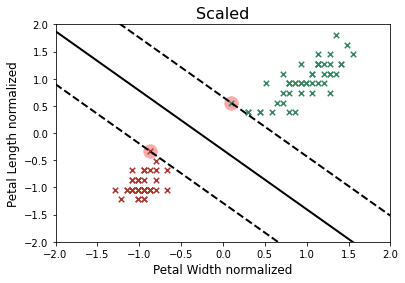

In [6]:
# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X_scaled, y)

plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled[y==1][:, 0], X_scaled[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled[y==0][:, 0], X_scaled[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.xlabel("Petal Width normalized", fontsize=12)
plt.ylabel("Petal Length normalized", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

### Questions:

1-Obtain and plot the SVM classifier for the dataset from Lab 1, Part 1.1. (X_syn, y_syn).

2-Which differences do you observe from the SVM classifier for the iris dataset?

3-How can you make it more "similar" to the iris classifier? Plot different SVM classifiers.

4-Load another real dataset from sklearn library, obtain the SVM classifier and plot both. Note: select only 2 features to be in dimension 2 as we did with the iris dataset.

5-Provide a table with accuracy results for all the classifiers above.


**Answer 1**

In [14]:
#Answer 1
def generate_synthetic_data():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]

    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    

    return X,y

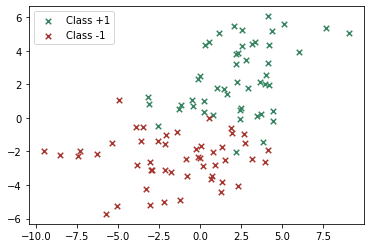

In [15]:
X_syn, y_syn = generate_synthetic_data() 
plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")

X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.3,random_state=109) # 70% training and 30% test
plt.legend(loc=2, fontsize=10)

plt.show()

In [9]:

scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X_train)

svm_clf = SVC(kernel="linear", C=100.0)
svm_clf.fit(X_scaled_1, y_train)


SVC(C=100.0, kernel='linear')

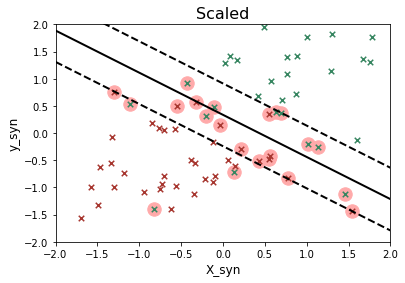

Accuracy: 0.8666666666666667


In [10]:
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled_1[y_train==1][:, 0], X_scaled_1[y_train==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled_1[y_train==0][:, 0], X_scaled_1[y_train==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.xlabel("X_syn", fontsize=12)
plt.ylabel("y_syn", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

y_pred = svm_clf.predict(X_test)
accuracy_1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**Answer 2** 
The difference that I observed from the iris dataset is that there are more elements overlapping inside the svm margin(if we have low c value). If we have a high c value the svm function takes a long time to execute its operation.

**Answer 3**

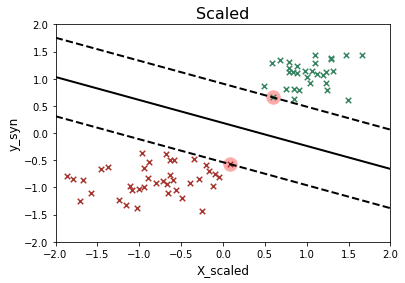

Accuracy: 1.0


In [11]:
#Answer 3
def generate_synthetic_data():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [8, 8], [[5, 1], [1, 5]]
    mu2, sigma2 = [-5,-5], [[10, 1], [1, 3]]

    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    

    return X,y
  
X_syn, y_syn = generate_synthetic_data() 

X_train, X_test, y_train, y_test = train_test_split(X_syn, y_syn, test_size=0.3,random_state=109) # 70% training and 30% test
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X_train)

svm_clf = SVC(kernel="linear", C=100.0)
svm_clf.fit(X_scaled_1, y_train)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.scatter(X_scaled_1[y_train==1][:, 0], X_scaled_1[y_train==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_scaled_1[y_train==0][:, 0], X_scaled_1[y_train==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


plt.xlabel("X_scaled", fontsize=12)
plt.ylabel("y_syn", fontsize=12)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

y_pred = svm_clf.predict(X_test)
accuracy_2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

**Answer 4**

Accuracy: 0.3684210526315789


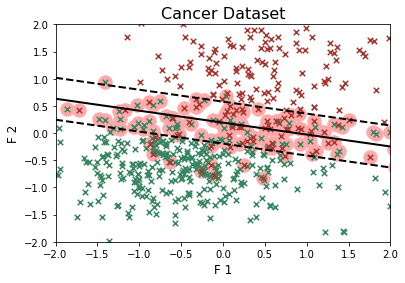

In [12]:
#Answer 4


from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test
X = cancer["data"][:,(1,2)]
y = cancer["target"]

clf = SVC(kernel='linear',C=100) # Linear Kernel
scaler = StandardScaler()
X_real= scaler.fit_transform(X)
#Train the model using the training sets
clf.fit(X_real, y)

plot_svc_decision_boundary(clf, -2, 2)
plt.scatter(X_real[y==1][:, 0], X_real[y==1][:, 1], color='#378661', marker='x', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_real[y==0][:, 0], X_real[y==0][:, 1], color='#A73730', marker='x', s=30, linewidth=1.5, label = "Class -1")


#plt.figure(figsize=(8,8))
plt.xlabel("F 1", fontsize=12)
plt.ylabel("F 2", fontsize=12)
plt.title("Cancer Dataset", fontsize=16)
plt.axis([-2, 2, -2, 2])



#Predict the response for test dataset
y_pred = clf.predict(X_test[:,(1,2)])
accuracy_3 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [13]:
#Accuracy Table


print(accuracy_1)  #Accuracy for the original dataste in part 1.1
print(accuracy_2)  # Accuracy for the dataset in part 1.1 that looks similar to iris dataset
print(accuracy_3)  # Accuracy for 2 dimesnions of cancer dataset

0.8666666666666667
1.0
0.3684210526315789


## 2.2 Generating Biased data

Now you are going to generate a toy example of synthetic biased data. You will reproduce the Representation bias and Aggregation bias defined in Lecture 2.

As a reminder:

Representation bias occurs when certain parts of the input space are underrepresented.

Aggregation bias arises when a one-size-fit-all model is used for groups with different conditional distributions.

In order to create these two type of bias, we can "play" with the probability of an object $i$ of being protected, and the parameters of the distribution (Gaussian in our example) these protected objects follow.

In the following, you will obtain a dataset with aggregation bias.

In [14]:
def generate_synthetic_data_bias():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.5 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[3,-2] # This is the increment of the mean for the positive class
    delta2=[3,-2] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    """ Generate the features randomly """
    #For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1,delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    

    return X,y,x_prot

In [15]:
X_syn, y_syn, x_bias = generate_synthetic_data_bias()

In [16]:
#print(X_syn)
#print(y_syn)
#print(x_bias)


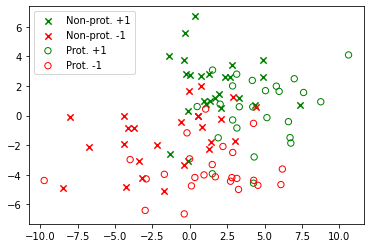

In [17]:
#plt.scatter(X_syn[y_syn==1][:, 0], X_syn[y_syn==1][:, 1], color='#378661', marker='x', s=40, linewidth=1.5, label= "Class +1")
#plt.scatter(X_syn[y_syn==0][:, 0], X_syn[y_syn==0][:, 1], color='#A73730', marker='x', s=40, linewidth=1.5, label = "Class -1")

X_s_0 = X_syn[x_bias == 0.0]
X_s_1 = X_syn[x_bias == 1.0]
y_s_0 = y_syn[x_bias == 0.0]
y_s_1 = y_syn[x_bias == 1.0]

plt.scatter(X_s_0[y_s_0==1][:, 0], X_s_0[y_s_0==1][:, 1], color='green', marker='x', s=40, linewidth=1.5, label= "Non-prot. +1")
plt.scatter(X_s_0[y_s_0==0][:, 0], X_s_0[y_s_0==0][:, 1], color='red', marker='x', s=40, linewidth=1.5, label = "Non-prot. -1")
plt.scatter(X_s_1[y_s_1==1][:, 0], X_s_1[y_s_1==1][:, 1], color='green', marker='o', facecolors='none', s=40, label = "Prot. +1")
plt.scatter(X_s_1[y_s_1==0][:, 0], X_s_1[y_s_1==0][:, 1], color='red', marker='o', facecolors='none', s=40, label = "Prot. -1")



plt.legend(loc=2, fontsize=10)

plt.show()

### Questions:

1-Create and plot a dataset with an aggregation bias (much) stronger than in the previous dataset.

2-Do you think the SVM classifier will perform with the same accuracy for the protected and non-protected groups? Why?

3-Create a dataset with representation bias (hint: you can only change p_sen and/or delta1 and/or delta2).

4-Find the SVM classifier for the 3 datasets: the one provided, the one from question 1 and the other one from question 3. (Answer: the coefficients (w,b) defining the classifier for each case).

5*-Provide a table reporting accuracy for the 3 cases from question 3.

6*-Plot the datasets and classifiers from question 3.



**Answer 1**

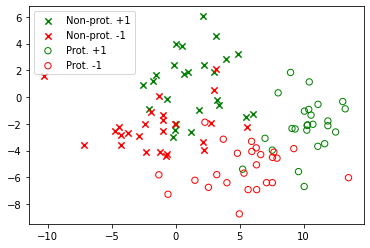

In [18]:
#Answer 1

def generate_synthetic_data_bias():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.5 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[8,-4] # This is the increment of the mean for the positive class
    delta2=[8,-4] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    """ Generate the features randomly """
    #For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class          
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1,delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    

    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias()

X_s_0 = X_syn[x_bias == 0.0]
X_s_1 = X_syn[x_bias == 1.0]
y_s_0 = y_syn[x_bias == 0.0]
y_s_1 = y_syn[x_bias == 1.0]

plt.scatter(X_s_0[y_s_0==1][:, 0], X_s_0[y_s_0==1][:, 1], color='green', marker='x', s=40, linewidth=1.5, label= "Non-prot. +1")
plt.scatter(X_s_0[y_s_0==0][:, 0], X_s_0[y_s_0==0][:, 1], color='red', marker='x', s=40, linewidth=1.5, label = "Non-prot. -1")
plt.scatter(X_s_1[y_s_1==1][:, 0], X_s_1[y_s_1==1][:, 1], color='green', marker='o', facecolors='none', s=40, label = "Prot. +1")
plt.scatter(X_s_1[y_s_1==0][:, 0], X_s_1[y_s_1==0][:, 1], color='red', marker='o', facecolors='none', s=40, label = "Prot. -1")



plt.legend(loc=2, fontsize=10)

plt.show()

**Answer 2**
No the accuracy of the SVM classifier will not be the same on protected and non proetected groups because from the plots above we can see the samples of both the groups overlap irregularly. Hence the accuracy will be different for both of them.

**Answer 3**

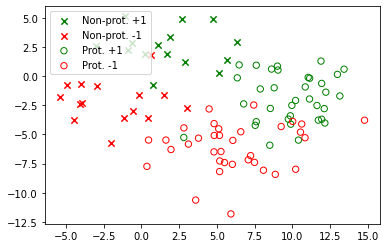

In [19]:
#Answer 3

def generate_synthetic_data_bias():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.7 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[8,-4] # This is the increment of the mean for the positive class
    delta2=[8,-4] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    """ Generate the features randomly """
    #For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1,delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    

    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias()

X_s_0 = X_syn[x_bias == 0.0]
X_s_1 = X_syn[x_bias == 1.0]
y_s_0 = y_syn[x_bias == 0.0]
y_s_1 = y_syn[x_bias == 1.0]

plt.scatter(X_s_0[y_s_0==1][:, 0], X_s_0[y_s_0==1][:, 1], color='green', marker='x', s=40, linewidth=1.5, label= "Non-prot. +1")
plt.scatter(X_s_0[y_s_0==0][:, 0], X_s_0[y_s_0==0][:, 1], color='red', marker='x', s=40, linewidth=1.5, label = "Non-prot. -1")
plt.scatter(X_s_1[y_s_1==1][:, 0], X_s_1[y_s_1==1][:, 1], color='green', marker='o', facecolors='none', s=40, label = "Prot. +1")
plt.scatter(X_s_1[y_s_1==0][:, 0], X_s_1[y_s_1==0][:, 1], color='red', marker='o', facecolors='none', s=40, label = "Prot. -1")



plt.legend(loc=2, fontsize=10)

plt.show()

**Answer 4**

In [20]:
#Answer 4

# SVM on Asnwer 1

def generate_synthetic_data_bias():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.5 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[8,-4] # This is the increment of the mean for the positive class
    delta2=[8,-4] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    """ Generate the features randomly """
    #For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class          
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1,delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    

    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias()

clf = SVC(kernel='linear',C=1) # Linear Kernel
scaler = StandardScaler()
X_real= scaler.fit_transform(X_syn)
#Train the model using the training sets
clf.fit(X_real, y_syn)



SVC(C=1, kernel='linear')

In [21]:
# SVM on original dataset

def generate_synthetic_data_bias():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.5 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[3,-2] # This is the increment of the mean for the positive class
    delta2=[3,-2] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    """ Generate the features randomly """
    #For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1,delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    

    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias()

clf = SVC(kernel='linear',C=1) # Linear Kernel
scaler = StandardScaler()
X_real= scaler.fit_transform(X_syn)
#Train the model using the training sets
clf.fit(X_real, y_syn)



SVC(C=1, kernel='linear')

In [22]:
#SVM on Answer 3

#Answer 3

def generate_synthetic_data_bias():

    """
        Code for generating the synthetic data.
        We will have two features and a binary class.
        
    """

    n_samples = 50 # generate these many data points per class
    #For biased data
    p_sen=0.7 #this parameter sets the probability of being protected (sensitive feature=1)
    delta1=[8,-4] # This is the increment of the mean for the positive class
    delta2=[8,-4] # This is the increment of the mean for the negative class
    
    
    def gen_gaussian_sensitive(size, mean_in, cov_in, class_label, sensitive):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        x_sen = np.ones(size, dtype=float) * sensitive
        return nv,X,y,x_sen

    """ Generate the features randomly """
    #For the NON-protected group (sensitive feature=0, for ex. men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1, x_sen1= gen_gaussian_sensitive(int((1-p_sen)*n_samples), mu1, sigma1, 1,0) # positive class
    nv2, X2, y2, x_sen2= gen_gaussian_sensitive(int((1-p_sen)*n_samples),mu2, sigma2, 0,0) # negative class
    
    
    #For the Protected group (sensitive feature=1, for ex. women)
    # We will generate one gaussian cluster for each class
    mu3, sigma3 = np.add(mu1,delta1), [[5, 1], [1, 5]]
    mu4, sigma4 = np.add(mu2,delta2), [[10, 1], [1, 3]]
    nv3, X3, y3, x_sen3 = gen_gaussian_sensitive(int(p_sen*n_samples), mu3, sigma3, 1,1.) # positive class
    nv4, X4, y4, x_sen4 = gen_gaussian_sensitive(int(p_sen*n_samples),mu4, sigma4, 0,1.) # negative class
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2, X3, X4))
    y = np.hstack((y1, y2, y3, y4))
    x_prot= np.hstack((x_sen1, x_sen2, x_sen3, x_sen4))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    x_prot=x_prot[perm]
    
    

    return X,y,x_prot

X_syn, y_syn, x_bias = generate_synthetic_data_bias()

clf = SVC(kernel='linear',C=1) # Linear Kernel
scaler = StandardScaler()
X_real= scaler.fit_transform(X_syn)
#Train the model using the training sets
clf.fit(X_real, y_syn)


SVC(C=1, kernel='linear')